# Lab 3 - Hopfield networks

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Hopfield network recall

In [2]:
x1 = np.array([[-1, -1,  1, -1,  1, -1, -1,  1]])
x2 = np.array([[-1, -1, -1, -1, -1,  1, -1, -1]])
x3 = np.array([[-1,  1,  1, -1, -1,  1, -1,  1]])
N = x1.shape[1]
W = (x1.T @ x1 + x2.T @ x2 + x3.T @ x3)/N

x1_star = np.sign(x1 @ W)
x2_star = np.sign(x2 @ W)
x3_star = np.sign(x3 @ W)

print(np.all(x1 == x1_star))
print(np.all(x2 == x2_star))
print(np.all(x3 == x3_star))

True
True
True


## Convergence and attractors

#### Try distorted patterns

In [3]:
def iterate_until_converged(x, weights, max_iters=100):
    x_star = np.sign(x @ weights)
    x_starstar = np.sign(x_star @ weights)
    iters = 0
    while iters < max_iters and not np.array_equal(x_star, x_starstar):
        iters += 1
        x_star = np.sign(x_starstar @ weights)
        x_starstar = np.sign(x_star @ weights)
    return x_star

In [4]:
x1d = np.array([[1, -1,  1, -1,  1, -1, -1,  1]])
x2d = np.array([[1,  1, -1, -1, -1,  1, -1, -1]])
x3d = np.array([[1,  1,  1, -1,  1,  1, -1,  1]])

print('x1d converged to x1?', np.all(iterate_until_converged(x1d, W) == x1))
print('x2d converged to x2?', np.all(iterate_until_converged(x2d, W) == x2))
print('x3d converged to x3?', np.all(iterate_until_converged(x3d, W) == x3))


x1d converged to x1? True
x2d converged to x2? True
x3d converged to x3? True


#### Automate search for attractors

In [5]:
attractors = {}
pat = 0
while pat < 2**8:
    pattern = np.ones((1,8))
    for i in range(8):
        if pat & 1<<i: pattern[0,i] = -1
    stable = iterate_until_converged(pattern, W)
    attractors[str(stable)] = True
    pat +=1
print('There are %d attractors in this network' % len(attractors.keys()))

There are 16 attractors in this network


## Sequential update

#### Import data and display some samples

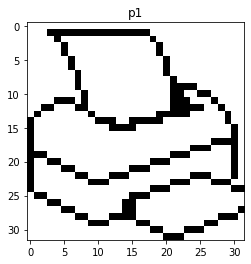

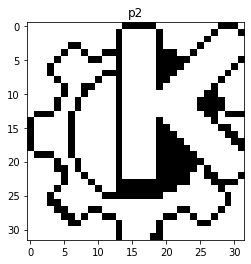

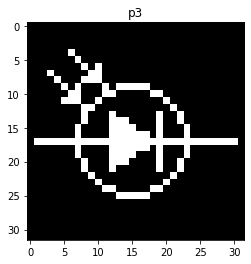

In [6]:
p = np.genfromtxt('data/pict.dat', delimiter=',').reshape((-1,1024))
def disp_32x32(x, title=None):
    plt.imshow(x.reshape(32,32).T, cmap='Greys')
    plt.title(title)
    plt.show()
    
disp_32x32(p[0], title='p1')
disp_32x32(p[1], title='p2')
disp_32x32(p[2], title='p3')

#### Learn three images and check stability

In [7]:
p1 = p[0].reshape(1,-1); p2 = p[1].reshape(1,-1); p3 = p[2].reshape(1, -1)
N = p1.shape[1]
W = (p1.T @ p1 + p2.T @ p2 + p3.T @ p3)/N

p1_star = np.sign(p1 @ W)
p2_star = np.sign(p2 @ W)
p3_star = np.sign(p3 @ W)

print('p1 == p1_star?', np.all(p1 == p1_star))
print('p2 == p2_star?', np.all(p2 == p2_star))
print('p3 == p3_star?', np.all(p3 == p3_star))

p1 == p1_star? True
p2 == p2_star? True
p3 == p3_star? True


#### Check distorted patterns

p1 == p10_star? True


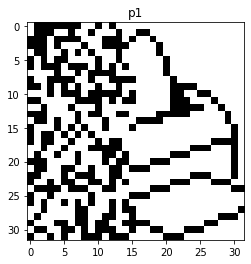

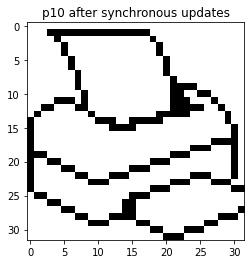

p2 == p11_star? False
p3 == p11_star? False


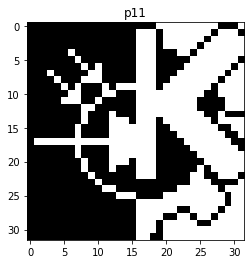

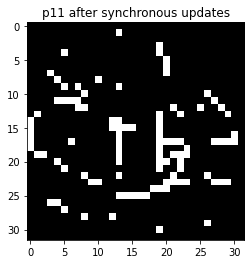

In [8]:
p10 = p[9].reshape(1,-1); p11 = p[10].reshape(1, -1)
p10_star = iterate_until_converged(p10, W)
p11_star = iterate_until_converged(p11, W)

print('p1 == p10_star?', np.all(p1 == p10_star))
disp_32x32(p10, title='p1')
disp_32x32(p10_star, title='p10 after synchronous updates')
print('p2 == p11_star?', np.all(p2 == p11_star))
print('p3 == p11_star?', np.all(p3 == p11_star))
disp_32x32(p11, title='p11')
disp_32x32(p11_star, title='p11 after synchronous updates')

#### Asynchronous unit updates

In [9]:
def sequential_update(x, weights, display_image=None):
    x = x.copy()
    x_old = -x
    it = 0
    while not np.all(x == x_old):
        x_old = x.copy()
        for unit in np.random.permutation(len(weights)):
            if display_image and it % display_image == 0:
                disp_32x32(x, title='Image after %d asynchronous iterations' % it)
            x_star = np.sign(x @ weights)
            x[0,unit] = x_star[0,unit]
            it += 1
    if display_image:
            disp_32x32(x, title='Image after %d asynchronous iterations' % it)
    return x

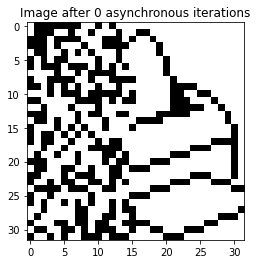

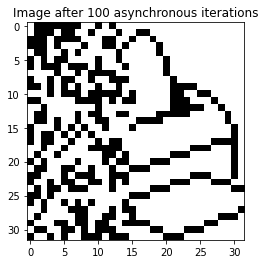

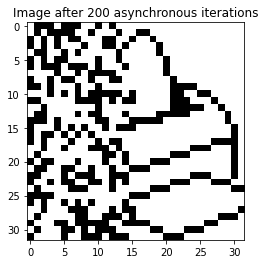

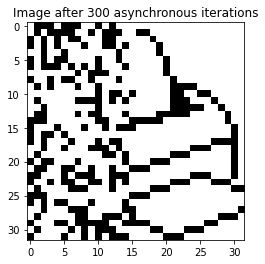

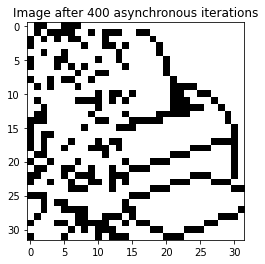

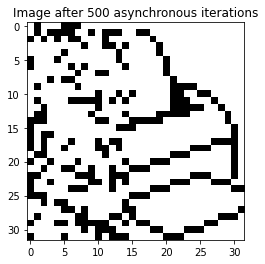

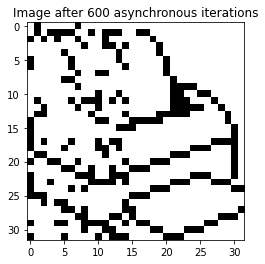

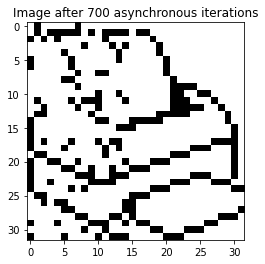

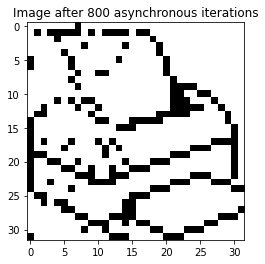

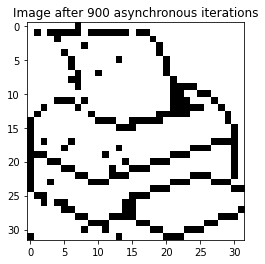

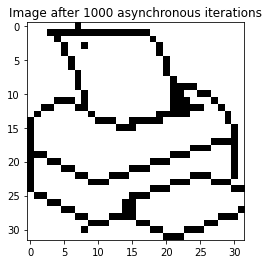

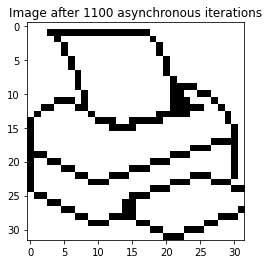

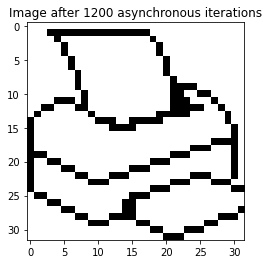

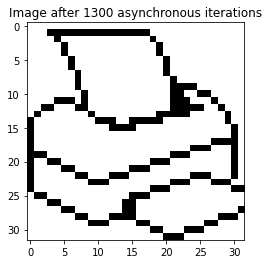

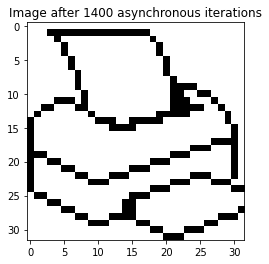

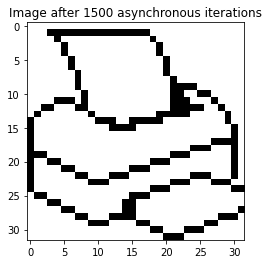

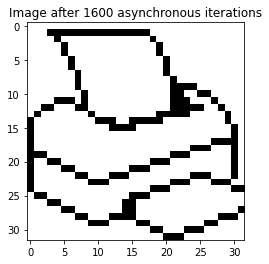

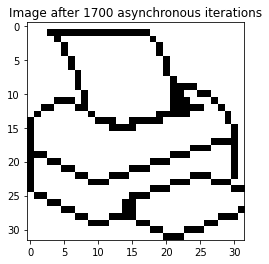

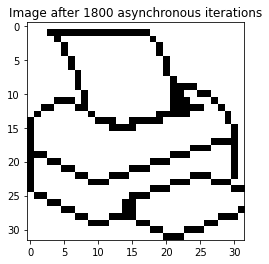

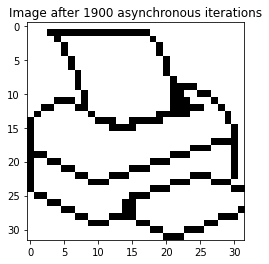

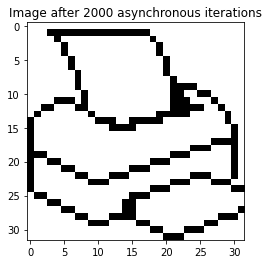

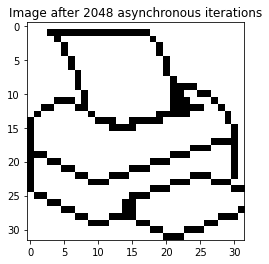

In [10]:
p10_star = sequential_update(p10, W, display_image=100)

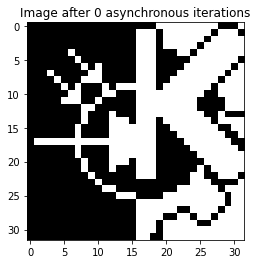

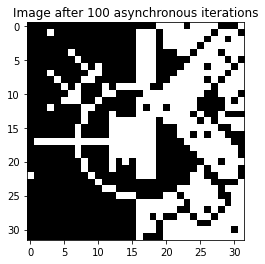

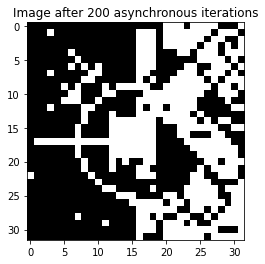

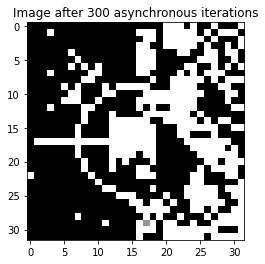

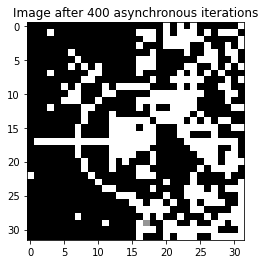

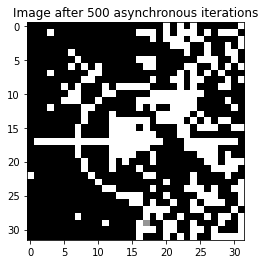

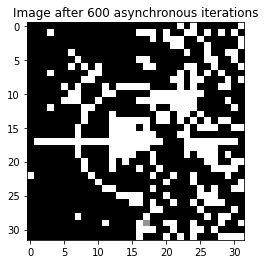

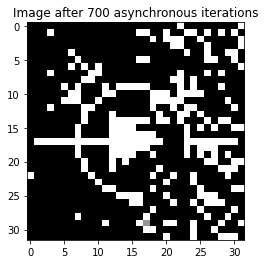

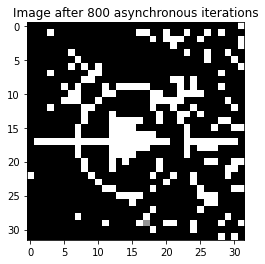

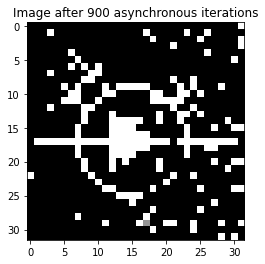

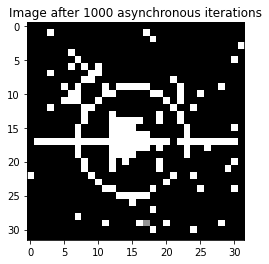

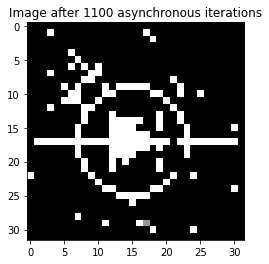

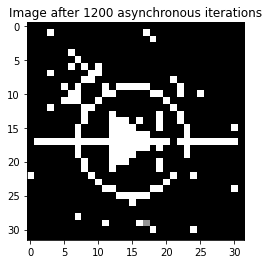

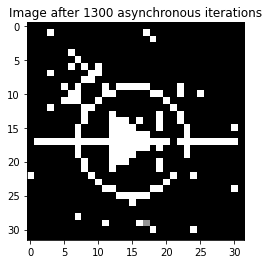

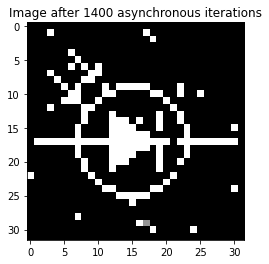

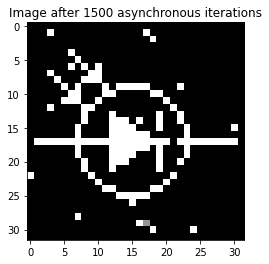

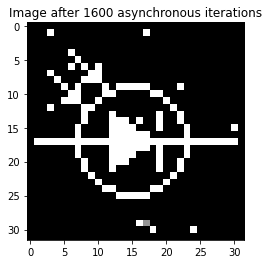

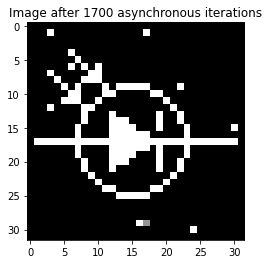

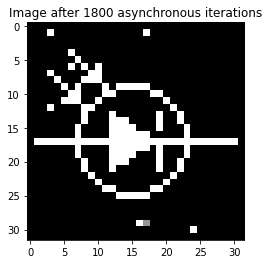

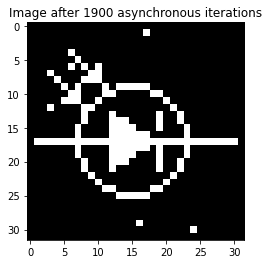

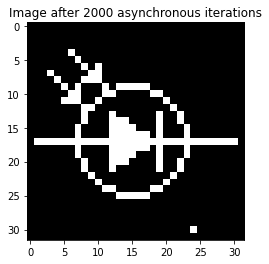

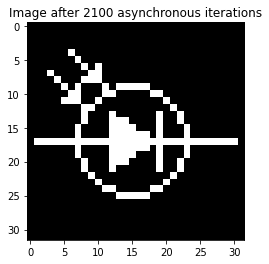

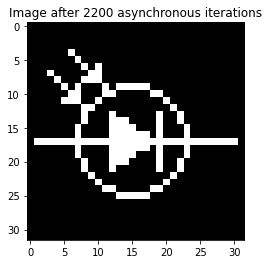

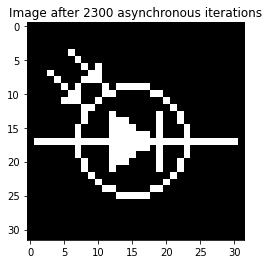

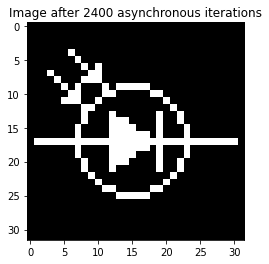

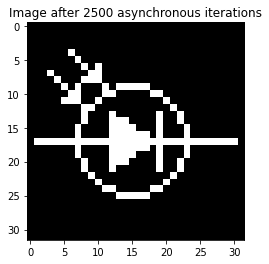

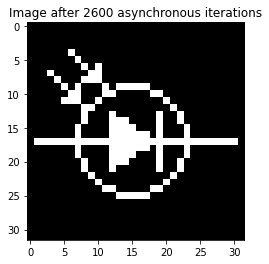

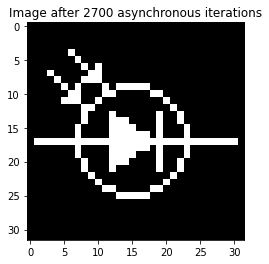

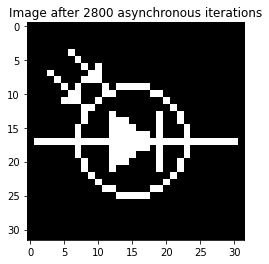

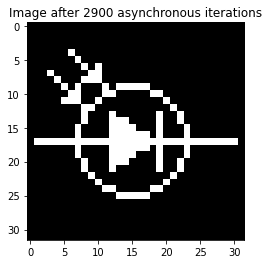

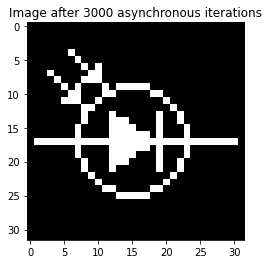

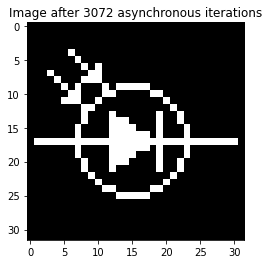

In [11]:
p11_star = sequential_update(p11, W, display_image=100)

## Energy

In [12]:
def energy(x, weights):
    s = 0
    X = x.T*x
    s = (weights*X).sum()
    return -s

#### Energy of attractors

In [13]:
E_p1 = energy(p1, W)
print('The energy of attractor p1 is %f' % E_p1)
E_p2 = energy(p2, W)
print('The energy of attractor p2 is %f' % E_p2)
E_p3 = energy(p3, W)
print('The energy of attractor p3 is %f' % E_p2)

The energy of attractor p1 is -1439.390625
The energy of attractor p2 is -1365.640625
The energy of attractor p3 is -1365.640625


#### Energy of distorted patterns

In [14]:
E_p10 = energy(p10, W)
print('The energy of distorted pattern p10 is %f' % E_p10)
E_p11 = energy(p11, W)
print('The energy of distorted pattern p11 is %f' % E_p11)

The energy of distorted pattern p10 is -415.980469
The energy of distorted pattern p11 is -173.500000


#### Energy change during sequential attractor approach

In [15]:
def sequential_update(x, weights, display_image=None, display_energy=False, max_iters=np.inf):
    x = x.copy()
    x_old = -x
    it = 0
    E = [energy(x, weights)]
    while it < max_iters and not np.all(x == x_old):
        x_old = x.copy()
        for unit in np.random.permutation(len(weights)):
            if it > max_iters: break
            
            if display_image and it % display_image == 0:
                disp_32x32(x, title='Image after %d asynchronous iterations' % it)
            if it % 100 == 0: print('Updating: iteration %d' % it, end='\r')
            x_star = np.sign(x @ weights)
            x[0,unit] = x_star[0,unit]
            it += 1
            if display_energy: 
                E.append(energy(x, weights))
    if display_image:
            disp_32x32(x, title='Image after %d asynchronous iterations' % it)
    if display_energy:
        plt.plot(range(len(E)), E)
        plt.ylabel('Energy')
        plt.xlabel('Iteration')
        plt.show()
    print()
    return x

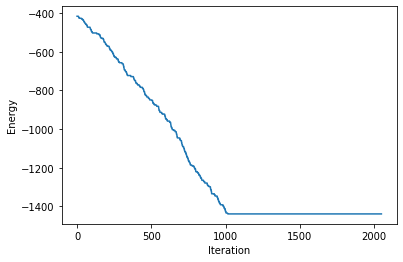

In [16]:
p10_star = sequential_update(p10, W, display_energy=True)

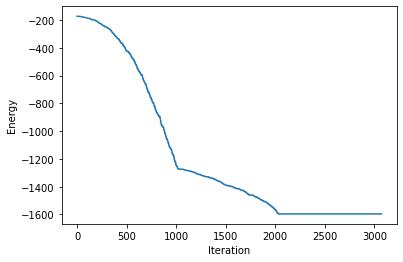

In [17]:
p11_star = sequential_update(p11, W, display_energy=True)

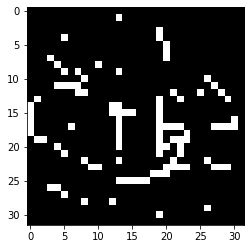

In [18]:
disp_32x32(p11_star)

#### Normally distributed weight matrix

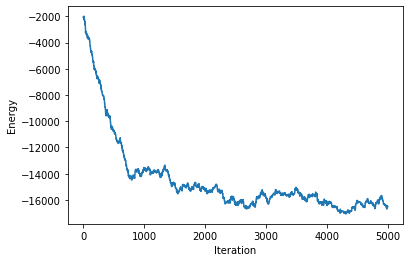

In [19]:
W_norm = np.random.randn(W.shape[0], W.shape[1])
p10_star = sequential_update(p10, W_norm, display_energy=True, max_iters=5000)

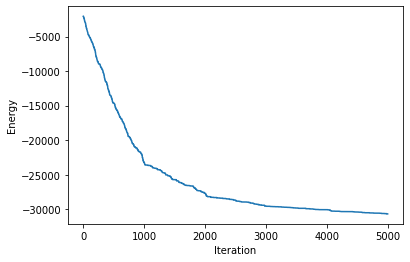

In [20]:
W_norm_sym = 0.5*(W_norm+W_norm.T)
p10_star = sequential_update(p10, W_norm_sym, display_energy=True, max_iters=5000)

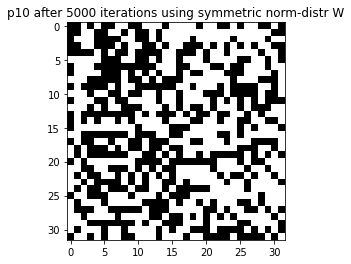

In [21]:
disp_32x32(p10_star, title='p10 after 5000 iterations using symmetric norm-distr W')

## Distortion Resistance

In [22]:
def flip_elems(x, flip_ratio=1.0):
    flip = np.random.choice(x.shape[1], int(x.shape[1]*flip_ratio), replace=False)
    x_flip = x.copy()
    x_flip[0, flip] = -x_flip[0, flip]
    return x_flip

def test_noise_resistance(x, weights, name='name'):
    fig, axs = plt.subplots(2,6, figsize=(15,8))
    flip_ratio = np.arange(0, 1.1, 0.1)
    fig.suptitle('%s with r%s noise' % (name, '%'))
    for i in range(len(flip_ratio)):
        flipped = flip_elems(x, flip_ratio[i])
        flipped_star = iterate_until_converged(flipped, weights)
        ax = axs[i//6, i%6]
        ax.set_title('r = %d' % int(100*flip_ratio[i]))
        ax.imshow(flipped_star.reshape(32,32).T, cmap='Greys')
    fig.delaxes(axs[1,5])
    plt.tight_layout()
    plt.show()


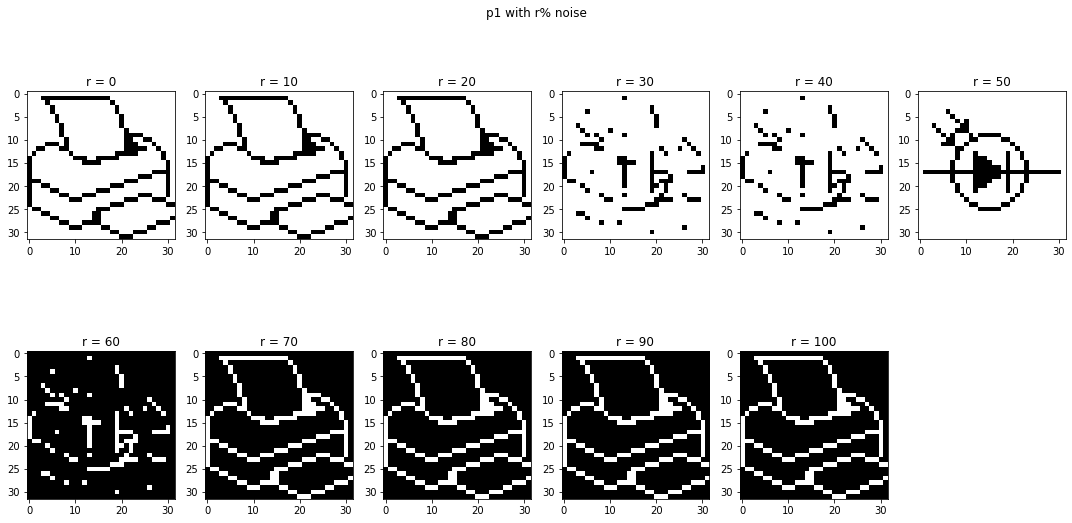

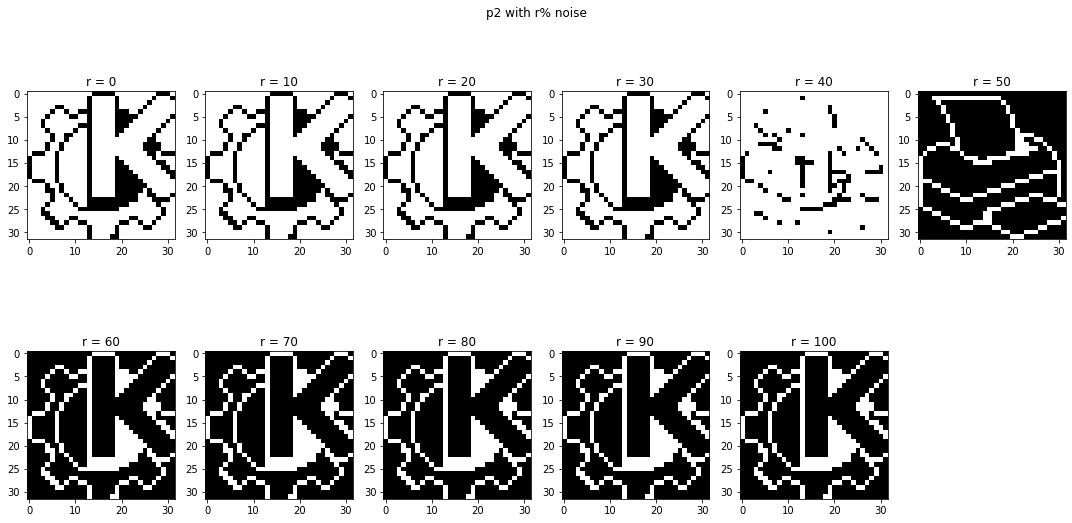

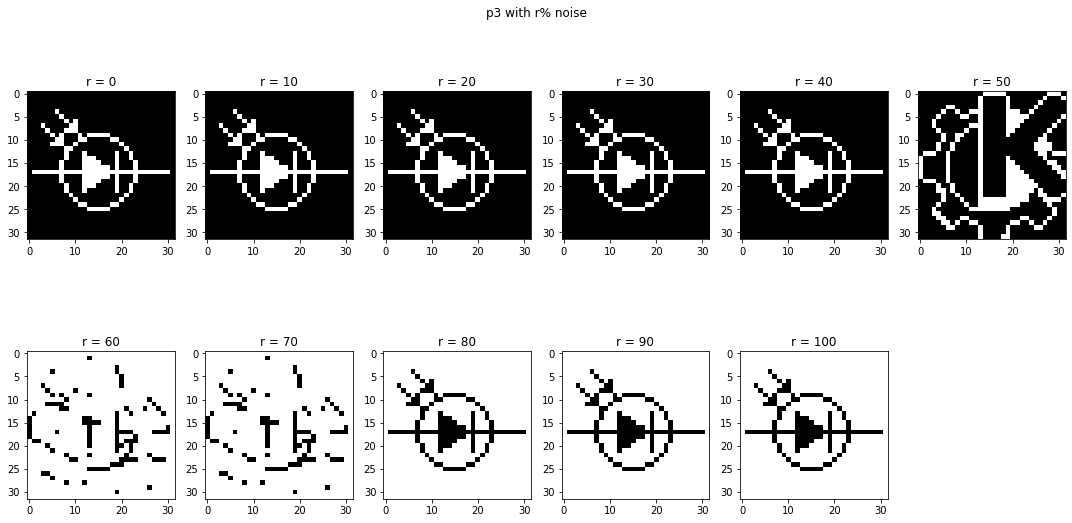

In [23]:
N = p1.shape[1]
W = (p1.T @ p1 + p2.T @ p2 + p3.T @ p3)/N
test_noise_resistance(p1, W, name='p1')
test_noise_resistance(p2, W, name='p2')
test_noise_resistance(p3, W, name='p3')

## Capacity

#### Noise resistance after adding p4

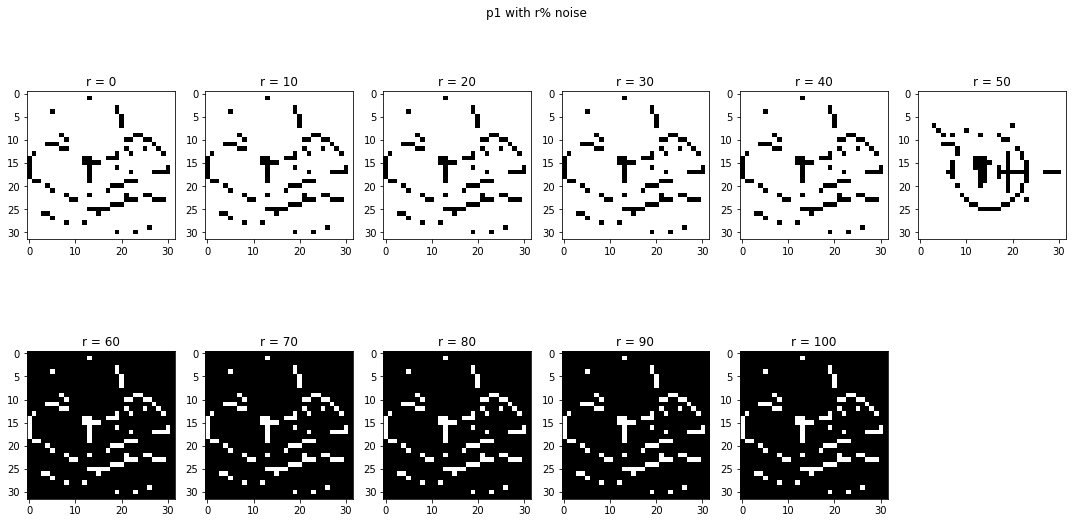

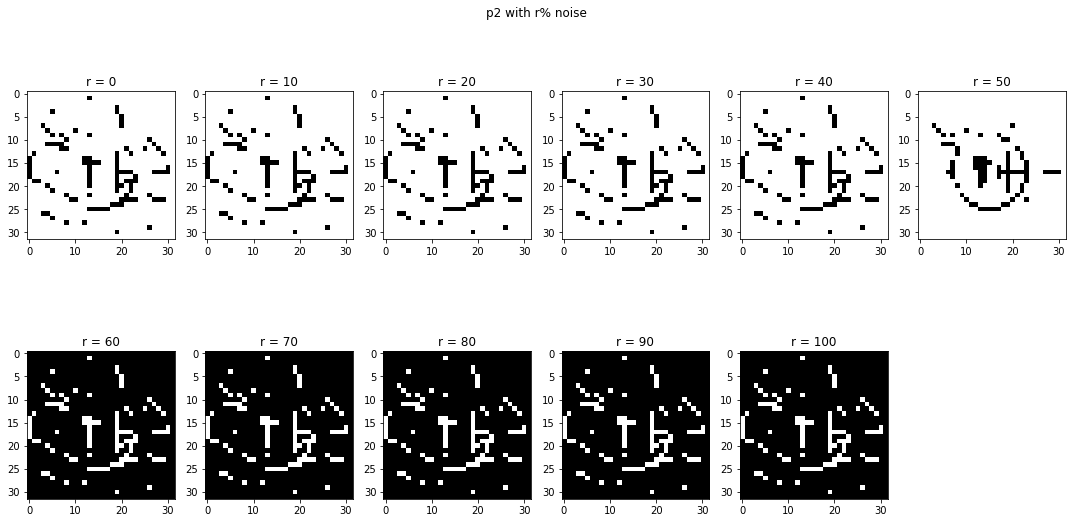

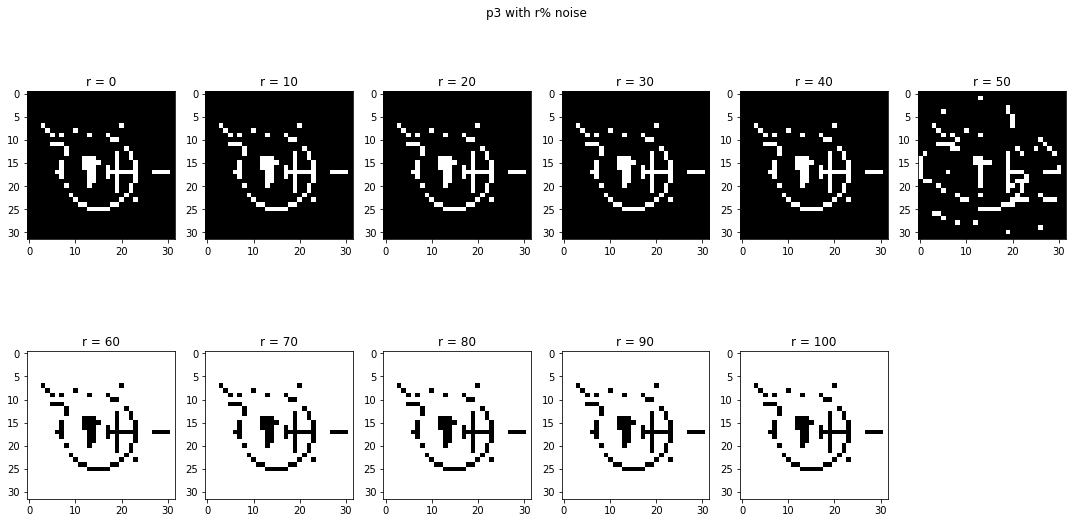

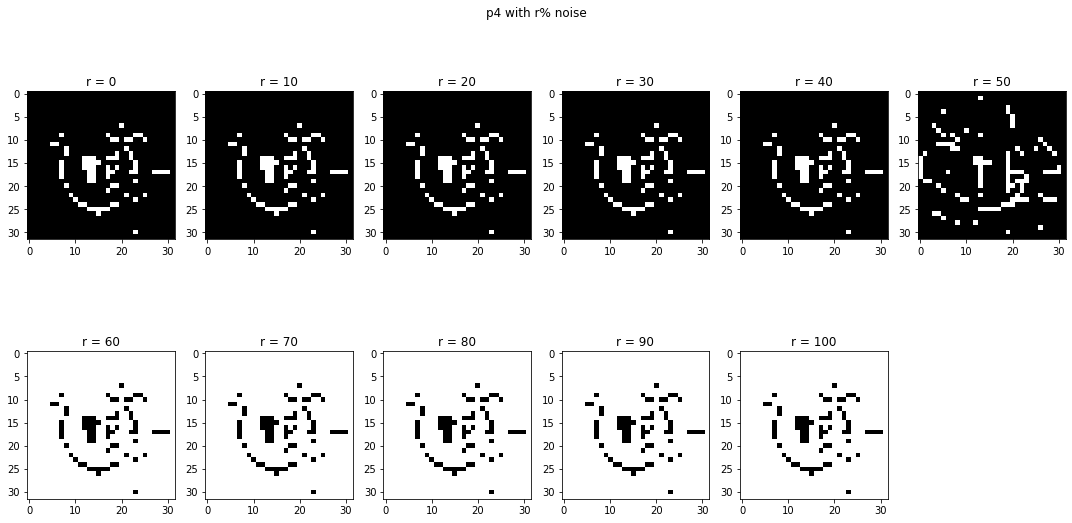

In [24]:
p4 = p[3].reshape(1,-1)
W = (p1.T @ p1 + p2.T @ p2 + p3.T @ p3 + p4.T @ p4)/N
test_noise_resistance(p1, W, name='p1')
test_noise_resistance(p2, W, name='p2')
test_noise_resistance(p3, W, name='p3')
test_noise_resistance(p4, W, name='p4')

#### Noise resistance after adding p5

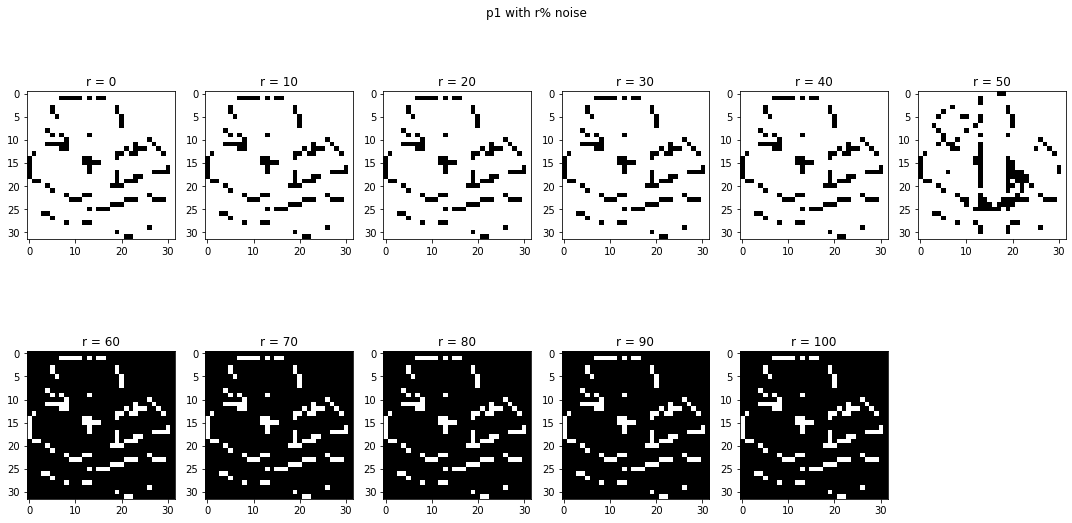

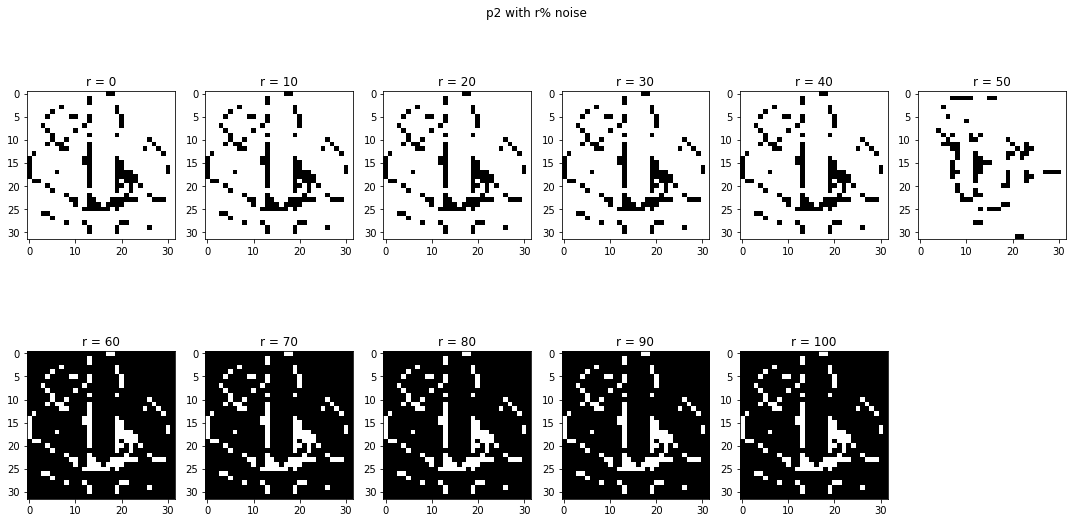

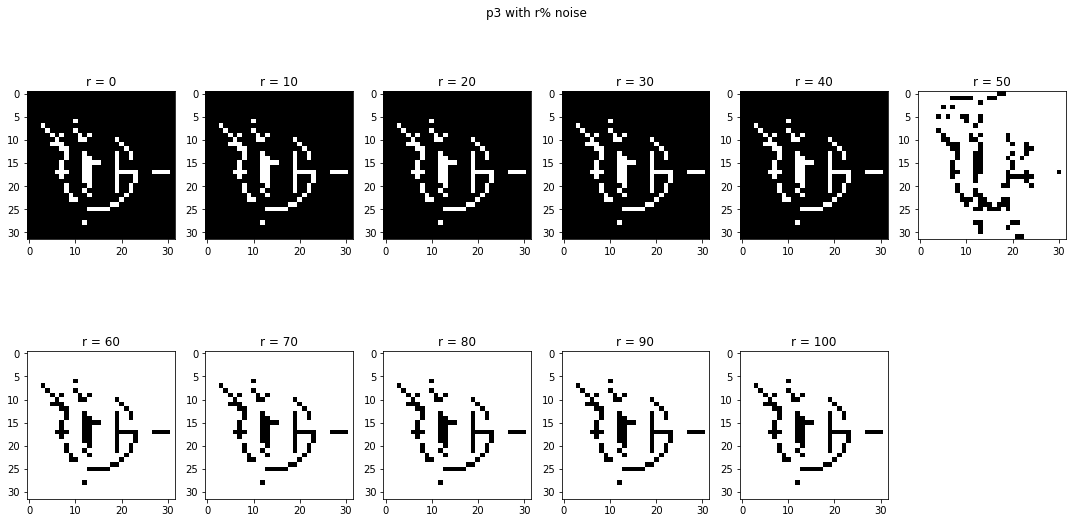

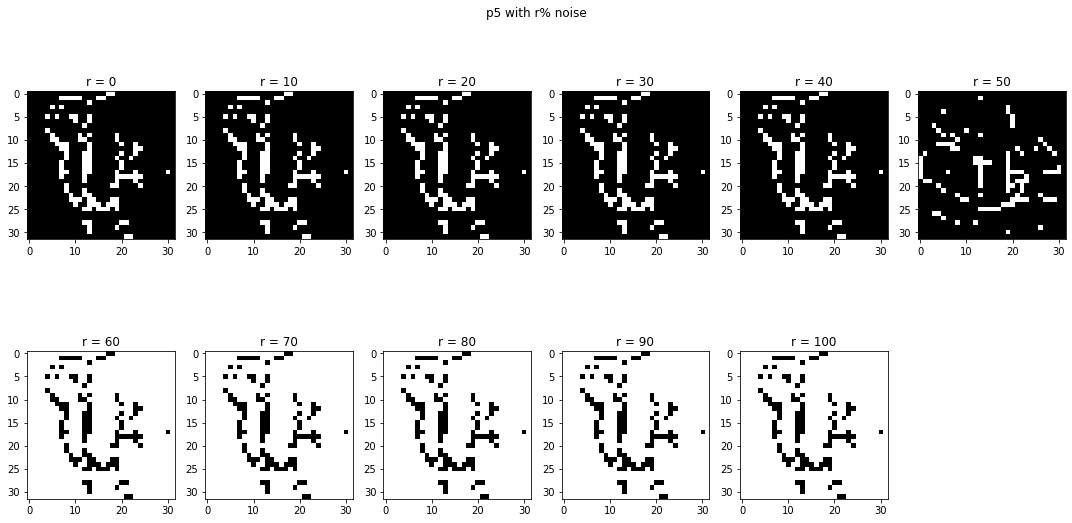

In [25]:
p5= p[5].reshape(1,-1)
W = (p1.T @ p1 + p2.T @ p2 + p3.T @ p3 + p5.T @ p5)/N
test_noise_resistance(p1, W, name='p1')
test_noise_resistance(p2, W, name='p2')
test_noise_resistance(p3, W, name='p3')
test_noise_resistance(p5, W, name='p5')

### Capacity with random patterns in a 100 unit network

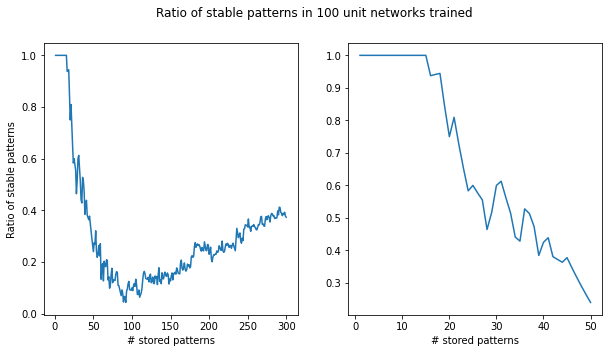

In [36]:
pattern = [None] * 300
stables = [-1] * 300
W = 0
N = 100
for i in range(300): 
    pattern[i] = np.sign(np.random.randn(1,N))
    W += (pattern[i].T @ pattern[i])/N
    
    count = 0
    for j in range(i+1):
        pattern_star = np.sign(pattern[j] @ W) 
        if np.all(pattern[j] == pattern_star): count += 1
    stables[i] = count/(i+1)

fig, axs = plt.subplots(1,2, figsize=(10,5))
fig.suptitle('Ratio of stable patterns in 100 unit networks trained')
axs[0].plot(range(1,301), stables)
axs[0].set_ylabel('Ratio of stable patterns')
axs[0].set_xlabel('# stored patterns')
axs[1].set_xlabel('# stored patterns')
axs[1].plot(range(1,51), stables[:50])
plt.show()

#### Same as above but with 10% noisy patterns

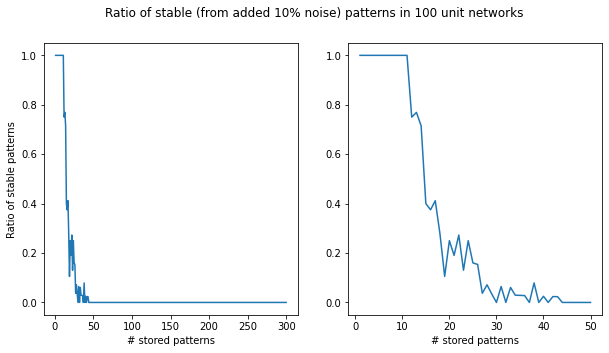

In [27]:
pattern = [None] * 300
stables = [-1] * 300
W = 0
for i in range(300): 
    pattern[i] = np.sign(np.random.randn(1,N))
    W += (pattern[i].T @ pattern[i])/N
    count = 0
    for j in range(i+1):
        flipped = flip_elems(pattern[j], flip_ratio=0.1)
        pattern_star = iterate_until_converged(flipped, W) 
        if np.all(pattern[j] == pattern_star): count += 1
    stables[i] = count/(i+1)

fig, axs = plt.subplots(1,2, figsize=(10,5))
fig.suptitle('Ratio of stable (from added 10% noise) patterns in 100 unit networks')
axs[0].plot(range(1,301), stables)
axs[0].set_ylabel('Ratio of stable patterns')
axs[0].set_xlabel('# stored patterns')
axs[1].set_xlabel('# stored patterns')
axs[1].plot(range(1,51), stables[:50])
plt.show()

### Capacity in a 100 unit network but with no self-connections

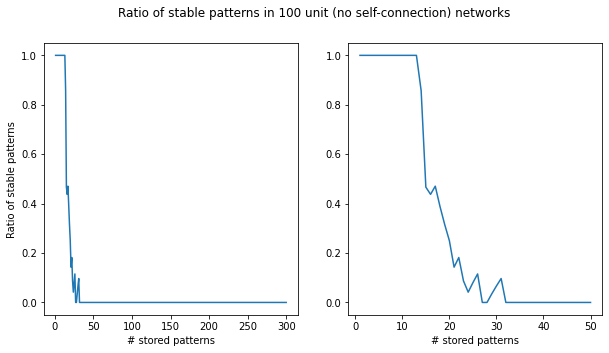

In [35]:
pattern = [None] * 300
stables = [-1] * 300
W = 0
for i in range(300): 
    pattern[i] = np.sign(np.random.randn(1,N))
    W += (pattern[i].T @ pattern[i])/N
    np.fill_diagonal(W, 0)
    count = 0
    for j in range(i+1):
        pattern_star = np.sign(pattern[j] @ W) 
        if np.all(pattern[j] == pattern_star): count += 1
    stables[i] = count/(i+1)

fig, axs = plt.subplots(1,2, figsize=(10,5))
fig.suptitle('Ratio of stable patterns in 100 unit (no self-connection) networks')
axs[0].plot(range(1,301), stables)
axs[0].set_ylabel('Ratio of stable patterns')
axs[0].set_xlabel('# stored patterns')
axs[1].set_xlabel('# stored patterns')
axs[1].plot(range(1,51), stables[:50])
plt.show()

#### Same as above but with 10% noisy patterns

Trying network storing 300 patterns


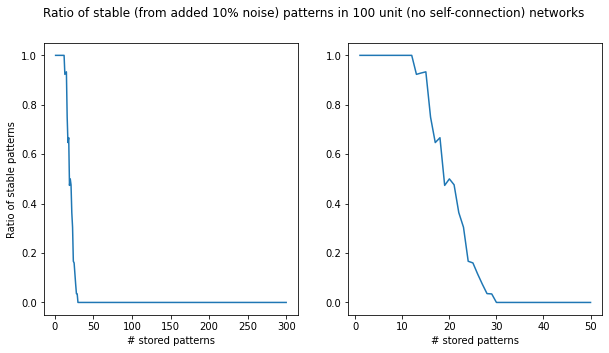

In [37]:
pattern = [None] * 300
stables = [-1] * 300
W = 0
for i in range(300): 
    print('Trying network storing %d patterns' % (i+1), end='\r')
    pattern[i] = np.sign(np.random.randn(1,N))
    W += (pattern[i].T @ pattern[i])/N
    np.fill_diagonal(W, 0)
    count = 0
    for j in range(i+1):
        flipped = flip_elems(pattern[j], flip_ratio=0.05)
        pattern_star = iterate_until_converged(flipped, W, max_iters=10) 
        if np.all(pattern[j] == pattern_star): count += 1
    stables[i] = count/(i+1)
print()
fig, axs = plt.subplots(1,2, figsize=(10,5))
fig.suptitle('Ratio of stable (from added 10% noise) patterns in 100 unit (no self-connection) networks')
axs[0].plot(range(1,301), stables)
axs[0].set_ylabel('Ratio of stable patterns')
axs[0].set_xlabel('# stored patterns')
axs[1].set_xlabel('# stored patterns')
axs[1].plot(range(1,51), stables[:50])
plt.show()

### Biased random patterns

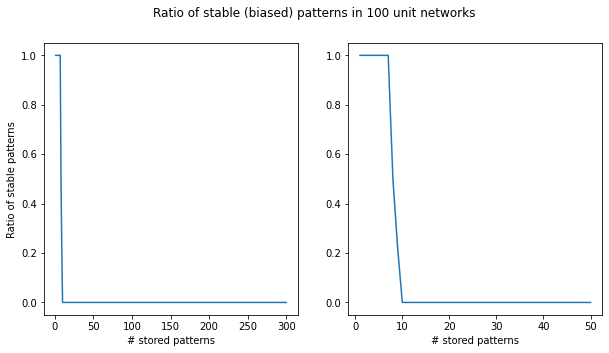

In [32]:
pattern = [None] * 300
stables = [-1] * 300
W = 0
for i in range(300): 
    pattern[i] = np.sign(0.5+np.random.randn(1,N))
    W += (pattern[i].T @ pattern[i])/N
    np.fill_diagonal(W, 0)
    count = 0
    for j in range(i+1):
        pattern_star = np.sign(pattern[j] @ W) 
        if np.all(pattern[j] == pattern_star): count += 1
    stables[i] = count/(i+1)

fig, axs = plt.subplots(1,2, figsize=(10,5))
fig.suptitle('Ratio of stable (biased) patterns in 100 unit networks')
axs[0].plot(range(1,301), stables)
axs[0].set_ylabel('Ratio of stable patterns')
axs[0].set_xlabel('# stored patterns')
axs[1].set_xlabel('# stored patterns')
axs[1].plot(range(1,51), stables[:50])
plt.show()

#### Same as above but with 10% noisy patterns

Trying network storing 300 patterns


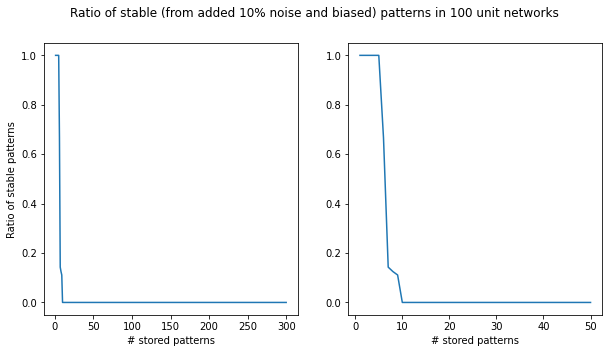

In [33]:
pattern = [None] * 300
stables = [-1] * 300
W = 0
for i in range(300): 
    print('Trying network storing %d patterns' % (i+1), end='\r')
    pattern[i] = np.sign(0.5+np.random.randn(1,N))
    W += (pattern[i].T @ pattern[i])/N
    np.fill_diagonal(W, 0)
    count = 0
    for j in range(i+1):
        flipped = flip_elems(pattern[j], flip_ratio=0.05)
        pattern_star = iterate_until_converged(flipped, W, max_iters=10) 
        if np.all(pattern[j] == pattern_star): count += 1
    stables[i] = count/(i+1)
print()
fig, axs = plt.subplots(1,2, figsize=(10,5))
fig.suptitle('Ratio of stable (from added 10% noise and biased) patterns in 100 unit networks')
axs[0].plot(range(1,301), stables)
axs[0].set_ylabel('Ratio of stable patterns')
axs[0].set_xlabel('# stored patterns')
axs[1].set_xlabel('# stored patterns')
axs[1].plot(range(1,51), stables[:50])
plt.show()

## Sparse Patterns

In [ ]:
pattern = [None] * 300
stables = [-1] * 300
W = 0
for i in range(300): 
    pattern[i] = np.where(np.random.randn(1,N)<0, 0, 1)
    W += (pattern[i].T @ pattern[i])/N
    np.fill_diagonal(W, 0)
    count = 0
    for j in range(i+1):
        pattern_star = np.sign(pattern[j] @ W) 
        if np.all(pattern[j] == pattern_star): count += 1
    stables[i] = count/(i+1)

fig, axs = plt.subplots(1,2, figsize=(10,5))
fig.suptitle('Ratio of stable patterns in 100 unit (no self-connection) networks')
axs[0].plot(range(1,301), stables)
axs[0].set_ylabel('Ratio of stable patterns')
axs[0].set_xlabel('# stored patterns')
axs[1].set_xlabel('# stored patterns')
axs[1].plot(range(1,51), stables[:50])
plt.show()